In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Dhaka Rent.csv", sep=';')
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [3]:
df.shape

(60, 2)

# Linear Regression experiment!

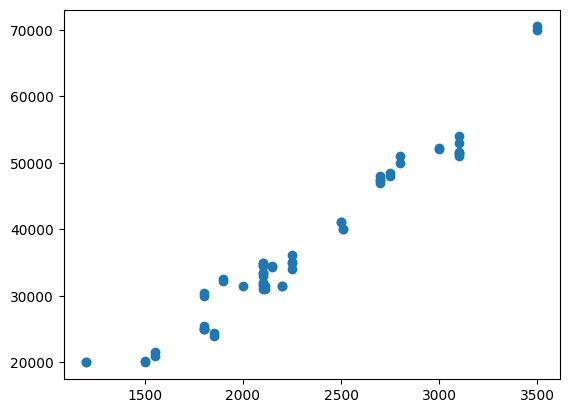

In [4]:
plt.scatter(df['area'], df['rent'])

Text(0.5, 1.0, 'Area vs Rent')

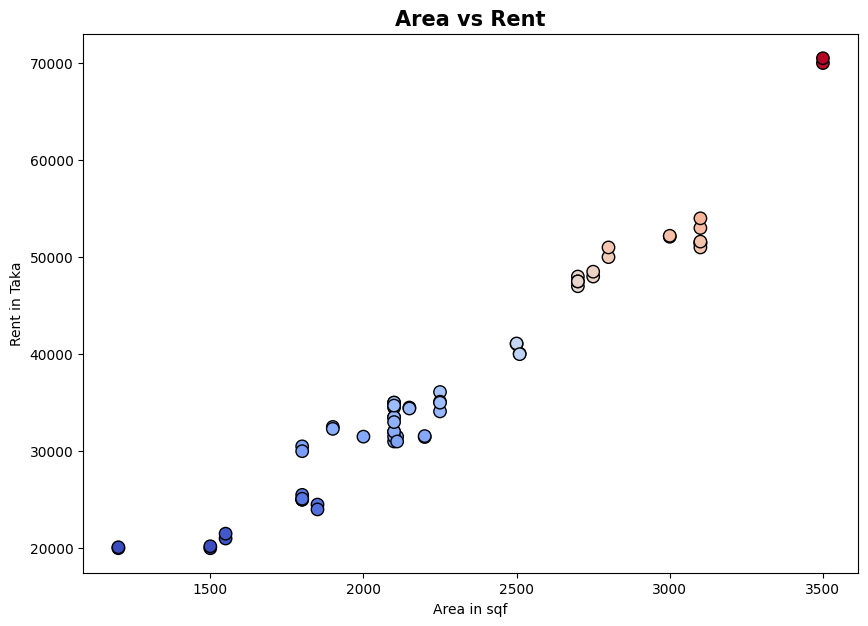

In [6]:
plt.figure(figsize=(10,7))

plt.scatter(df['area'], 
            df['rent'], 
            c=df['rent'], 
            cmap='coolwarm', 
            s=80, 
            alpha=1,
            edgecolor='k') #shift + tab

plt.xlabel('Area in sqf', fontsize=10)
plt.ylabel('Rent in Taka',fontsize=10)
plt.title('Area vs Rent',fontsize=15, weight='bold')

## LR with hard coded formula

In [7]:
x = df['area']
y = df['rent']
dev_x = x - np.mean(x)
dev_y = y - np.mean(y)

In [8]:
m = np.sum(dev_x * dev_y)/ np.sum(dev_x**2)
c = np.mean(y) - m * np.mean(x)
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [9]:
m*2500 + c

np.float64(41761.91823759879)

## Linear Regression using SKLEARN

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
reg = LinearRegression()
reg.fit(df[['area']], y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
reg.coef_


array([21.29266147])

In [34]:
reg.intercept_

np.float64(-11469.735446431114)

In [36]:
reg.predict([[2500]])

C:\Users\fijav\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41761.9182376])

In [13]:
reg.predict(df[['area']])

array([31115.58750079, 33244.85364815, 41761.9182376 , 36438.7528692 ,
       52408.2489744 , 28986.32135343, 20469.25676399, 27921.68827975,
       46020.45053232, 33244.85364815, 34309.48672183, 33244.85364815,
       33244.85364815, 41974.84485233, 36438.7528692 , 54537.51512177,
       26857.05520607, 21533.88983767, 26857.05520607, 46020.45053232,
       33457.78026289, 33244.85364815, 63054.57971121, 14081.4583219 ,
       48149.71667968, 54537.51512177, 47085.083606  , 26857.05520607,
       35374.11979552, 54537.51512177, 33244.85364815, 33244.85364815,
       41761.9182376 , 36438.7528692 , 52408.2489744 , 28986.32135343,
       20469.25676399, 27921.68827975, 46020.45053232, 33244.85364815,
       34309.48672183, 33244.85364815, 33244.85364815, 41974.84485233,
       36438.7528692 , 54537.51512177, 26857.05520607, 21533.88983767,
       26857.05520607, 46020.45053232, 33457.78026289, 33244.85364815,
       63054.57971121, 14081.4583219 , 48149.71667968, 54537.51512177,
      

In [14]:
reg.score(df[['area']], df[['rent']])

0.950249380357677

In [15]:
df2 = df.copy()

In [17]:
df2['Predicted'] = reg.predict(df[['area']])
df2.head()

,area,rent,Predicted
0,2000,31500,31115.587501
1,2100,35000,33244.853648
2,2500,41050,41761.918238
3,2250,36100,36438.752869
4,3000,52100,52408.248974


### Best fit line plot

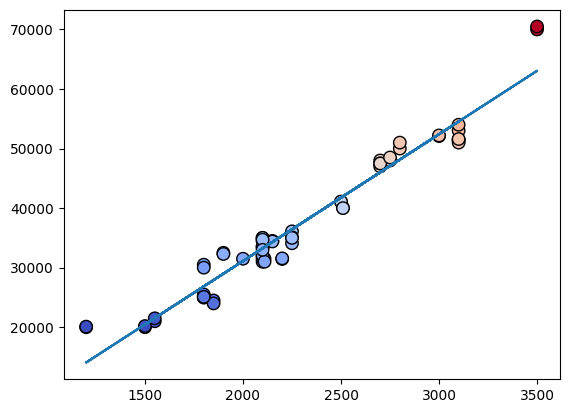

In [ ]:
# reg.predict(df[['area']])) = "Y"
plt.plot(df[['area']], reg.predict(df[['area']]))

plt.scatter(df['area'], 
            df['rent'], 
            c=df['rent'], 
            cmap='coolwarm', 
            s=80, 
            alpha=1,
            edgecolor='k')  

[]

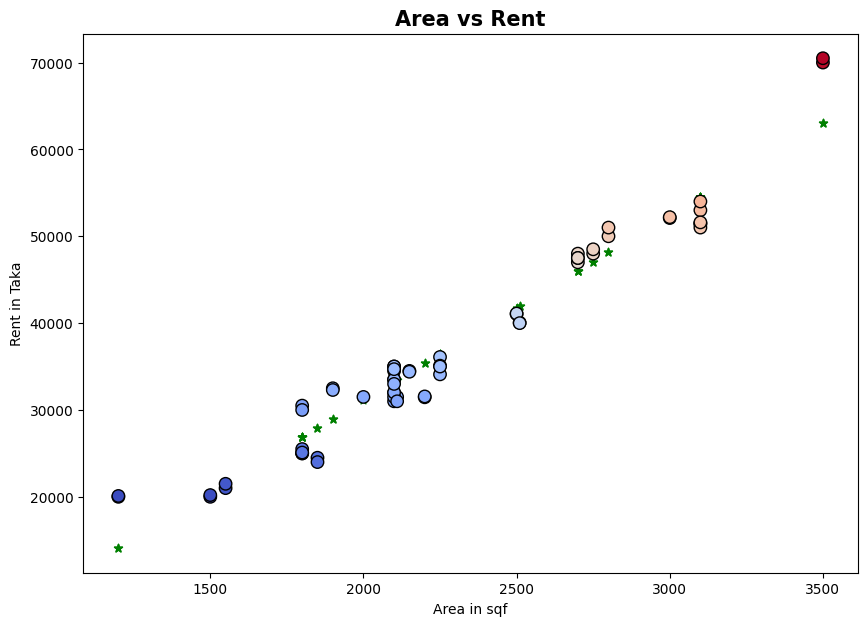

In [31]:
plt.figure(figsize=(10,7))
plt.scatter(df['area'],reg.predict(df[['area']]),color='green', marker='*')

plt.scatter(df['area'], 
            df['rent'], 
            c=df['rent'], 
            cmap='coolwarm', 
            s=80, 
            alpha=1,
            edgecolor='k')  

plt.xlabel('Area in sqf', fontsize=10)
plt.ylabel('Rent in Taka',fontsize=10)
plt.title('Area vs Rent',fontsize=15, weight='bold')

plt.plot()

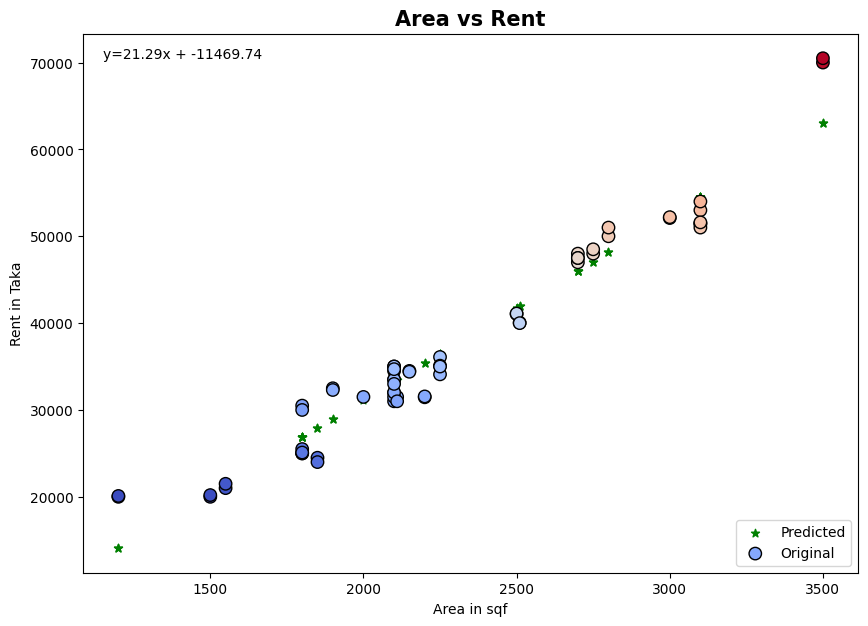

In [51]:
plt.figure(figsize=(10,7))


m = reg.coef_[0]
c = reg.intercept_
equ = f"y={float(m):.2f}x + {float(c):.2f}"

plt.text(min(df['area'])-50, max(df['rent']), equ)

plt.scatter(df['area'],reg.predict(df[['area']]),color='green', marker='*', label ='Predicted')

plt.scatter(df['area'], 
            df['rent'], 
            c=df['rent'], 
            cmap='coolwarm', 
            s=80, 
            alpha=1,
            edgecolor='k',
            label ='Original')  

plt.xlabel('Area in sqf', fontsize=10)
plt.ylabel('Rent in Taka',fontsize=10)
plt.title('Area vs Rent',fontsize=15, weight='bold')


plt.legend()
plt.show()

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(df2[['rent']], df2['Predicted'])

6778077.204095561

In [62]:
mean_absolute_error(df2[['rent']], df2['Predicted'])

2009.8695093576282